In [17]:
import pandas as pd

bowling = pd.read_excel("../data/bowling_ml_letsgo.xlsx")
bowling.head()

,Unnamed: 0,height,exp,pro_exp,birth,weight,ball_pound,left_hand,right_hand,cranker,stroker,twohanded,thumbless,CON_ST,L_READ,OVERCOME,SPARE_SUC,TOT_AVG
0,0,180,23,3,1986-07-03,60,15.0,1,0,1,0,0,0,4.400000,-9.000000,0.652252,0.811789,215.800000
1,1,173,22,3,1984-10-03,79,15.0,0,1,1,0,0,0,5.750000,-9.750000,0.687281,0.659609,246.000000
2,2,179,13,4,1993-10-24,130,15.0,0,1,1,0,0,0,2.750000,-9.250000,0.475010,0.542429,190.500000
3,3,175,10,8,1981-08-01,72,15.0,0,1,1,0,0,0,4.000000,-8.750000,0.455561,0.768218,212.500000
4,5,174,26,10,1976-09-28,74,15.0,0,1,1,0,0,0,3.333333,-8.666667,0.783212,0.624562,198.333333


- height : 신장, exp : 구력, pro_exp : 프로경력, birth : 생년월일, weight : 체중, ball_pound : 볼무게, CON_ST : 장타, L_READ : 리딩능력, OVERCOME : 극복능력, SPACE_SUC : 스페어성공률

In [15]:
bowling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19 non-null     int64  
 1   height      19 non-null     int64  
 2   exp         19 non-null     int64  
 3   pro_exp     19 non-null     int64  
 4   birth       19 non-null     object 
 5   weight      19 non-null     int64  
 6   ball_pound  19 non-null     float64
 7   left_hand   19 non-null     int64  
 8   right_hand  19 non-null     int64  
 9   cranker     19 non-null     int64  
 10  stroker     19 non-null     int64  
 11  twohanded   19 non-null     int64  
 12  thumbless   19 non-null     int64  
 13  CON_ST      19 non-null     float64
 14  L_READ      19 non-null     float64
 15  OVERCOME    19 non-null     float64
 16  SPARE_SUC   19 non-null     float64
 17  TOT_AVG     19 non-null     float64
dtypes: float64(6), int64(11), object(1)
memory usage: 2.8+ KB


In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams["axes.unicode_minus"] = False #마이너스 부호 때문에 한글이 깨질 수가 있어 주는 설정
rc("font", family="Malgun Gothic")
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline

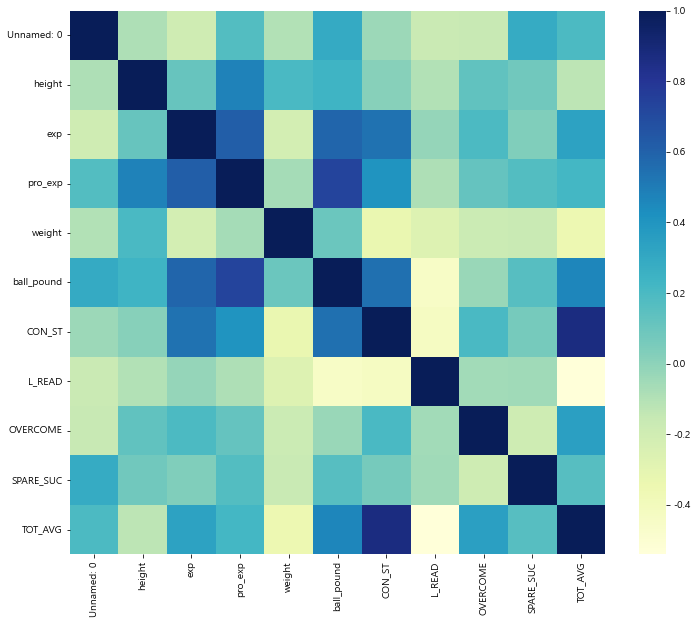

In [23]:
bowling_m = bowling.drop(['left_hand', 'right_hand', 'cranker', 'stroker', 'twohanded', 'thumbless', 'Unnamed: 0'], axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(bowling_m.corr(), cmap='YlGnBu')
plt.show()

- exp, CON_ST, OVERCOME, SPACE_SUC 등이 TOT_AVG와 상관관계가 있어 보인다!

In [69]:
bowling_m = bowling_m[['TOT_AVG', 'CON_ST', 'L_READ', 'OVERCOME', 'SPARE_SUC']]

In [26]:
bowling_m.head()

,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC
0,215.800000,4.400000,-9.000000,0.652252,0.811789
1,246.000000,5.750000,-9.750000,0.687281,0.659609
2,190.500000,2.750000,-9.250000,0.475010,0.542429
3,212.500000,4.000000,-8.750000,0.455561,0.768218
4,198.333333,3.333333,-8.666667,0.783212,0.624562


#### Train과 Test 분리 - CON_ST, L_READ, OVERCOME, SPARE_SUC 사용

In [48]:
from sklearn.model_selection import train_test_split

X = bowling_m.drop('TOT_AVG',axis=1)
y = bowling_m['TOT_AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
lr_pred = lr.predict(X_test)

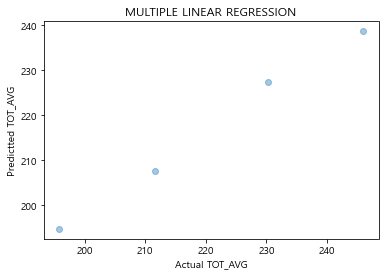

In [53]:
plt.scatter(y_test, lr_pred, alpha=0.4)
plt.xlabel("Actual TOT_AVG")
plt.ylabel("Predictted TOT_AVG")
plt.title("MULTIPLE LINEAR REGRESSION") 
plt.show()

- 결정계수(R제곱) 조회

In [80]:
r_square = lr.score(X_test, y_test)
r_square

0.8968194047447069

- 회귀계수 확인

In [82]:
print(lr.coef_, lr.intercept_)

[11.37094559 -4.68028086 21.29205194 21.96104708] 98.54163170814284


- 예측 데이터와 실데이터 출력

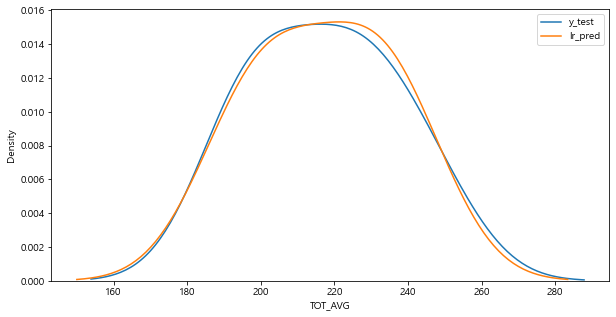

In [83]:
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label="y_test") 
ax2 = sns.kdeplot(lr_pred, label='lr_pred', ax=ax1)
plt.legend()
plt.show()

- 원 데이터로 예측

In [84]:
y_hat = lr.predict(X)

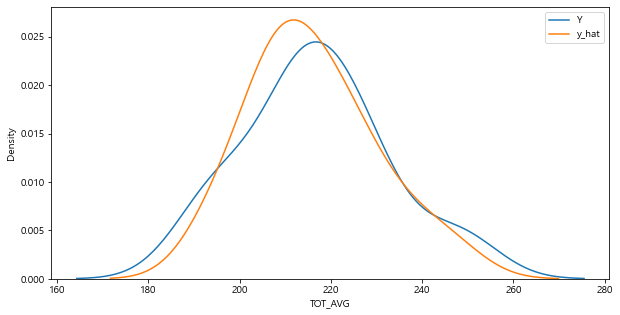

In [85]:
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label="Y")
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

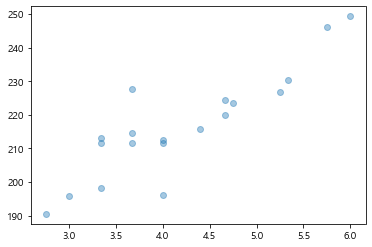

In [34]:
plt.scatter(bowling_m[['CON_ST']],bowling_m[['TOT_AVG']], alpha=0.4)
plt.show()

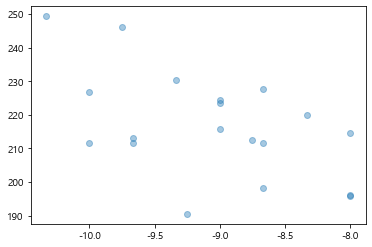

In [35]:
plt.scatter(bowling_m[['L_READ']],bowling_m[['TOT_AVG']], alpha=0.4)
plt.show()

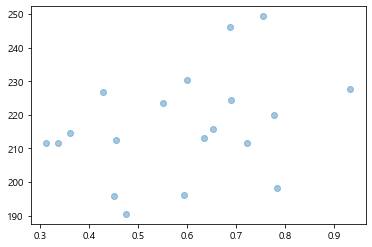

In [36]:
plt.scatter(bowling_m[['OVERCOME']],bowling_m[['TOT_AVG']], alpha=0.4)
plt.show()

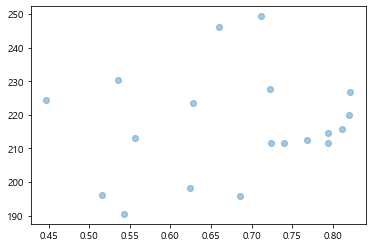

In [37]:
plt.scatter(bowling_m[['SPARE_SUC']],bowling_m[['TOT_AVG']], alpha=0.4)
plt.show()

In [38]:
lr.score(X_train, y_train)

0.7790941532060095

#### 컬럼별 box plot

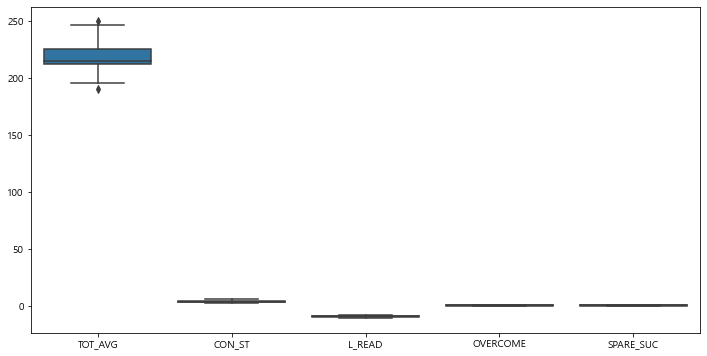

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=bowling_m);

- label에 대해서만 box plot 그려보기

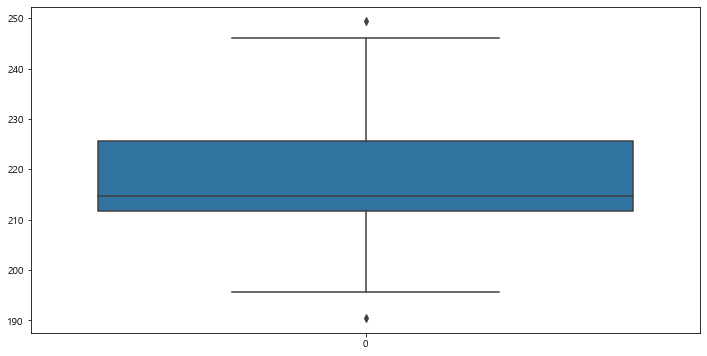

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=bowling_m['TOT_AVG']);

<Figure size 864x432 with 0 Axes>

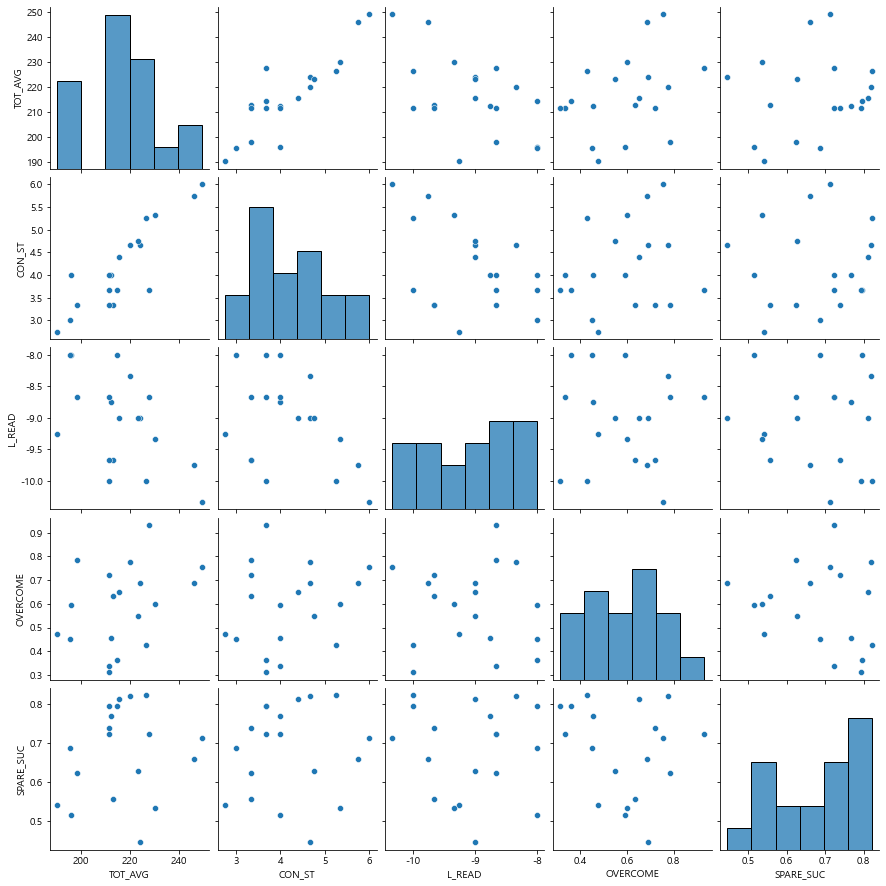

In [58]:
plt.figure(figsize=(12, 6))
sns.pairplot(data=bowling_m);

- 뚜렷하지는 않지만 CON_ST와 TOT_AVG와의 상관관계가 있는 것 같음

<Figure size 864x432 with 0 Axes>

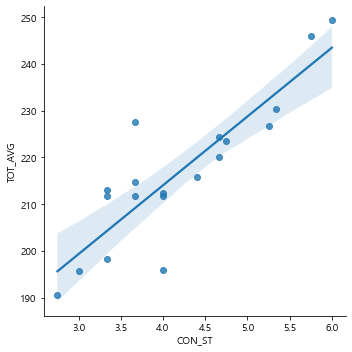

In [59]:
plt.figure(figsize=(12, 6))
sns.lmplot(x='CON_ST', y='TOT_AVG', data=bowling_m);

- 그럼 CON_ST와 TOT_AVG와의 관계만 알아보지

In [60]:
import statsmodels.api as sm

X = bowling_m['CON_ST']
y = bowling_m['TOT_AVG']
lm = sm.OLS(y, X).fit()

In [61]:
lm.summary()

C:\Users\heaju\miniconda3\envs\ds_study\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                TOT_AVG   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              733.8
Date:                Wed, 11 May 2022   Prob (F-statistic):                    4.85e-16
Time:                        22:10:02   Log-Likelihood:                         -93.753
No. Observations:                  19   AIC:                                      189.5
Df Residuals:                      18   BIC:                                      190.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CON_ST        50.1196      1.850     27.089      0.000      46.233      54.007
==============================================================================
Omnibus:                        3.537   Durbin-Watson:                   2.595
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                1.425
Skew:                          -0.230   Prob(JB):                        0.490
Kurtosis:                       1.739   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared가 높은 편, AIC는 189.5

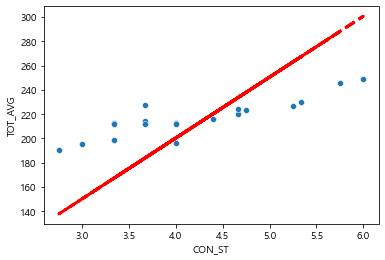

In [63]:
pred = lm.predict(X)

sns.scatterplot(x=X, y=y)
plt.plot(X, pred, 'r', ls='dashed', lw=3);

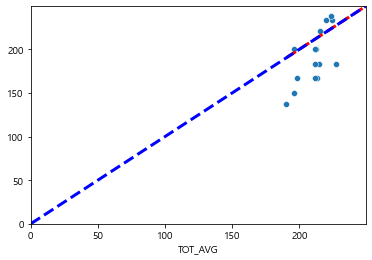

In [64]:
sns.scatterplot(x=y, y=pred)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r', ls='dashed', lw=3);
plt.plot([0, max(y)], [0, max(y)], 'b', ls='dashed', lw=3);     # 0,0부터 그리는 선 
plt.axis([0, max(y), 0, max(y)]);

In [66]:
X = np.c_[X, [1]*len(X)]
X[:5]

array([[4.4       , 1.        ],
       [5.75      , 1.        ],
       [2.75      , 1.        ],
       [4.        , 1.        ],
       [3.33333333, 1.        ]])

In [67]:
lm = sm.OLS(y, X).fit()
lm.summary()

C:\Users\heaju\miniconda3\envs\ds_study\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TOT_AVG   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     53.62
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.19e-06
Time:                        22:13:07   Log-Likelihood:                -65.263
No. Observations:                  19   AIC:                             134.5
Df Residuals:                      17   BIC:                             136.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            14.7280      2.011      7.323      0.000      10.485      18.971
const        155.1374      8.617     18.003      0.000     136.957     173.318
==============================================================================
Omnibus:                        2.516   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                0.861
Skew:                           0.177   Prob(JB):                        0.650
Kurtosis:                       3.981   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared는 낮아졌지만, AIC도 낮아졌다(모델이 데이터를 얼마나 많이 반영하는지, 즉, 낮을수록 좋음)

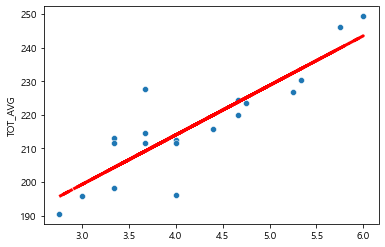

In [68]:
pred = lm.predict(X)

sns.scatterplot(x=X[:, 0], y=y)
plt.plot(X[:, 0], pred, 'r', ls='dashed', lw=3);

#### 다시 데이터 분리 - CON_ST, L_READ, OVERCOME, SPARE_SUC 모두 반영

In [70]:
bowling_m = bowling_m[['TOT_AVG', 'CON_ST', 'L_READ', 'OVERCOME', 'SPARE_SUC']]

In [71]:
from sklearn.model_selection import train_test_split

X = bowling_m.drop('TOT_AVG', axis=1)
y = bowling_m['TOT_AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [72]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()
lm.summary()

C:\Users\heaju\miniconda3\envs\ds_study\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                TOT_AVG   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              1321.
Date:                Wed, 11 May 2022   Prob (F-statistic):                    1.89e-12
Time:                        22:17:23   Log-Likelihood:                         -46.933
No. Observations:                  13   AIC:                                      101.9
Df Residuals:                       9   BIC:                                      104.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CON_ST         8.3824      4.035      2.078      0.068      -0.744      17.509
L_READ       -12.1691      2.340     -5.201      0.001     -17.462      -6.877
OVERCOME      34.8533     15.682      2.223      0.053      -0.622      70.328
SPARE_SUC     68.8558     29.003      2.374      0.042       3.247     134.465
==============================================================================
Omnibus:                        1.298   Durbin-Watson:                   2.755
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                1.028
Skew:                           0.590   Prob(JB):                        0.598
Kurtosis:                       2.289   Cond. No.                         98.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared 가 더 높아지고 AIC는 더 낮아짐

In [86]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [87]:
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  6.183920283861188
RMSE of Test Data :  6.5443942999374105


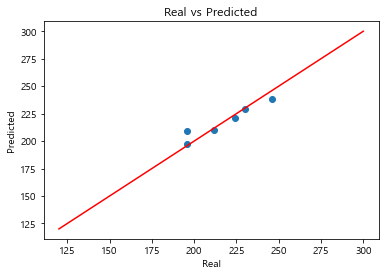

In [90]:
plt.scatter(y_test, pred_test)
plt.xlabel("Real")
plt.ylabel('Predicted')
plt.title('Real vs Predicted')
plt.plot([120, 300], [120, 300], 'r')
plt.show()

- L_READ를 뺀 나머지 CON_ST, OVERCOME, SPARE_SUC만 반영

In [101]:
X = bowling_m.drop(['TOT_AVG', 'L_READ'], axis=1)
y = bowling_m['TOT_AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [102]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  7.26022494774671
RMSE of Test Data :  4.897967325738156


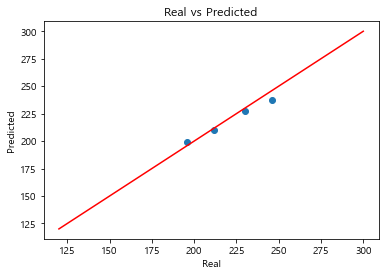

In [103]:
plt.scatter(y_test, pred_test)
plt.xlabel("Real")
plt.ylabel('Predicted')
plt.title('Real vs Predicted')
plt.plot([120, 300], [120, 300], 'r')
plt.show()

- CON_ST, L_READ, SPARE_SUC만 반영

In [104]:
X = bowling_m.drop(['TOT_AVG', 'OVERCOME'], axis=1)
y = bowling_m['TOT_AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [105]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  7.432177921917889
RMSE of Test Data :  4.208940804788774


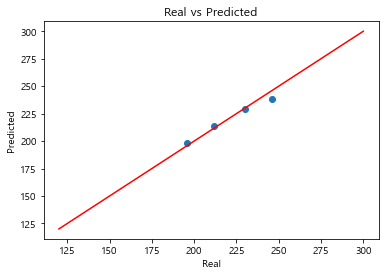

In [106]:
plt.scatter(y_test, pred_test)
plt.xlabel("Real")
plt.ylabel('Predicted')
plt.title('Real vs Predicted')
plt.plot([120, 300], [120, 300], 'r')
plt.show()

- CON_ST, L_READ, OVERCOME만 반영

In [107]:
X = bowling_m.drop(['TOT_AVG', 'SPARE_SUC'], axis=1)
y = bowling_m['TOT_AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [108]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  7.031171992079442
RMSE of Test Data :  3.626333409299124


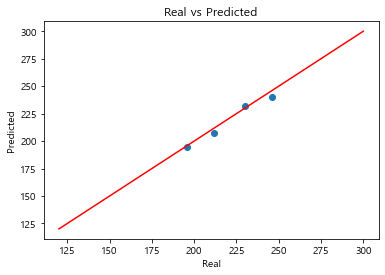

In [109]:
plt.scatter(y_test, pred_test)
plt.xlabel("Real")
plt.ylabel('Predicted')
plt.title('Real vs Predicted')
plt.plot([120, 300], [120, 300], 'r')
plt.show()

- L_READ, OVERCOME, SPARE_SUC만 반영

In [110]:
X = bowling_m.drop(['TOT_AVG', 'CON_ST'], axis=1)
y = bowling_m['TOT_AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [111]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  10.861605243885911
RMSE of Test Data :  15.612200415436421


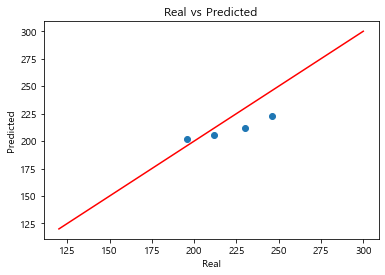

In [112]:
plt.scatter(y_test, pred_test)
plt.xlabel("Real")
plt.ylabel('Predicted')
plt.title('Real vs Predicted')
plt.plot([120, 300], [120, 300], 'r')
plt.show()

- min-max scaling

In [114]:
bowling_m.head()

,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC
0,215.800000,4.400000,-9.000000,0.652252,0.811789
1,246.000000,5.750000,-9.750000,0.687281,0.659609
2,190.500000,2.750000,-9.250000,0.475010,0.542429
3,212.500000,4.000000,-8.750000,0.455561,0.768218
4,198.333333,3.333333,-8.666667,0.783212,0.624562


In [122]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
bowling_mms = mms.fit_transform(bowling_m)
bowling_mms_pd = pd.DataFrame(bowling_mms, columns=bowling_m.columns)
bowling_mms_pd.head()

,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC
0,0.430028,0.507692,0.571429,0.548268,0.973629
1,0.943343,0.923077,0.250000,0.604706,0.568044
2,0.000000,0.000000,0.464286,0.262702,0.255741
3,0.373938,0.384615,0.678571,0.231366,0.857506
4,0.133144,0.179487,0.714286,0.759266,0.474638


In [130]:
from sklearn.model_selection import train_test_split

X = bowling_mms_pd.drop('TOT_AVG', axis=1)
y = bowling_mms_pd['TOT_AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [131]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [132]:
pred_tr = lr.predict(X_train)
pred_test = lr.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  0.10510912663786733
RMSE of Test Data :  0.11123616373831319


In [133]:
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

C:\Users\heaju\miniconda3\envs\ds_study\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                TOT_AVG   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              47.36
Date:                Thu, 12 May 2022   Prob (F-statistic):                    4.77e-06
Time:                        14:04:26   Log-Likelihood:                          10.649
No. Observations:                  13   AIC:                                     -13.30
Df Residuals:                       9   BIC:                                     -11.04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CON_ST         0.6626      0.167      3.971      0.003       0.285       1.040
L_READ        -0.0828      0.132     -0.627      0.546      -0.381       0.216
OVERCOME       0.2205      0.116      1.904      0.089      -0.042       0.483
SPARE_SUC      0.1495      0.138      1.084      0.307      -0.163       0.462
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                0.757
Skew:                          -0.008   Prob(JB):                        0.685
Kurtosis:                       1.818   Cond. No.                         7.04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- standard scaling

In [127]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
bowling_ss = ss.fit_transform(bowling_m)
bowling_ss_pd = pd.DataFrame(bowling_ss, columns=bowling_m.columns)
bowling_ss_pd.head()

,TOT_AVG,CON_ST,L_READ,OVERCOME,SPARE_SUC
0,-0.066266,0.234471,0.082023,0.376106,1.175288
1,1.907269,1.725594,-0.996890,0.585194,-0.172963
2,-1.719592,-1.588011,-0.277615,-0.681827,-1.211123
3,-0.281917,-0.207343,0.441660,-0.797915,0.789270
4,-1.207692,-0.943699,0.561539,1.157788,-0.483462


In [134]:
X = bowling_ss_pd.drop('TOT_AVG', axis=1)
y = bowling_ss_pd['TOT_AVG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [135]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [136]:
pred_tr = lr.predict(X_train)
pred_test = lr.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  0.40411202362133847
RMSE of Test Data :  0.42766858279621206


In [137]:
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

C:\Users\heaju\miniconda3\envs\ds_study\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                TOT_AVG   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              8.859
Date:                Thu, 12 May 2022   Prob (F-statistic):                     0.00348
Time:                        14:08:02   Log-Likelihood:                         -6.6677
No. Observations:                  13   AIC:                                      21.34
Df Residuals:                       9   BIC:                                      23.60
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CON_ST         0.6976      0.158      4.410      0.002       0.340       1.055
L_READ        -0.1208      0.145     -0.835      0.425      -0.448       0.206
OVERCOME       0.1992      0.128      1.558      0.154      -0.090       0.488
SPARE_SUC      0.1165      0.162      0.719      0.490      -0.250       0.483
==============================================================================
Omnibus:                        0.615   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.592
Skew:                           0.179   Prob(JB):                        0.744
Kurtosis:                       2.018   Cond. No.                         1.75
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""